#Assignment1
Create a time-series plot showing daily total revenue for three different countries with three countries in one plot

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data1=pd.read_csv("Project-assignmenttable1.csv")
data1


,date,country,total_revenue
0,2007-04-08,Malawi,0.99
1,2007-04-10,Estonia,5.98
2,2007-03-18,Germany,17.94
3,2007-04-11,Estonia,2.99
4,2007-04-08,Anguilla,0.99
...,...,...,...
2470,2007-03-02,Kazakstan,8.98
2471,2007-02-18,Ukraine,8.99
2472,2007-03-18,Senegal,4.99
2473,2007-04-28,South Korea,25.95


In [ ]:
data1.sort_values('date', inplace=True)

In [ ]:
countries = ['Canada', 'France', 'India']

In [ ]:
filtered_data = data1[data1['country'].isin(countries)]

In [ ]:
time_series = filtered_data.groupby(['date', 'country'])['total_revenue'].sum()

In [ ]:
time_series = time_series.reset_index()

In [ ]:
pivot_data1 = time_series.pivot(index='date', columns='country', values='total_revenue')

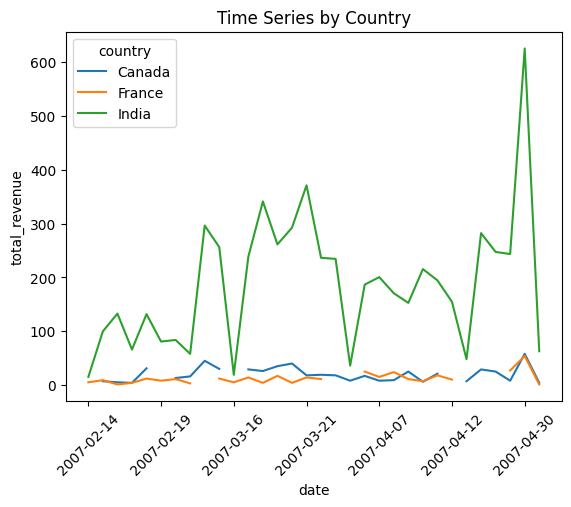

In [ ]:
pivot_data1.plot()
plt.xlabel('date')
plt.ylabel('total_revenue')
plt.title('Time Series by Country')
plt.xticks(rotation=45)
plt.show()

#Assignment2
Carry out a sentiment analysis on movie descriptions adding another column to the data frame that provides a sentiment classification.

In [81]:
pip install textblob


In [82]:
data2=pd.read_csv("Project-assignmenttable2.csv")
data2

,title,description
0,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...
1,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...
2,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...
3,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...
4,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...
...,...,...
995,Young Language,A Unbelieveable Yarn of a Boat And a Database ...
996,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...
997,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...
998,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...


In [86]:
from textblob import TextBlob
import pandas as pd

data2['sentiment'] = data2['description'].apply(lambda x: TextBlob(x).sentiment.polarity)


data2.loc[data2['sentiment'] > 0, 'sentiment_category'] = 'Positive'
data2.loc[data2['sentiment'] == 0, 'sentiment_category'] = 'Neutral'
data2.loc[data2['sentiment'] < 0, 'sentiment_category'] = 'Negative'


print(data2)


                 title                                        description  \
0      Chamber Italian  A Fateful Reflection of a Moose And a Husband ...   
1     Grosse Wonderful  A Epic Drama of a Cat And a Explorer who must ...   
2      Airport Pollock  A Epic Tale of a Moose And a Girl who must Con...   
3    Bright Encounters  A Fateful Yarn of a Lumberjack And a Feminist ...   
4     Academy Dinosaur  A Epic Drama of a Feminist And a Mad Scientist...   
..                 ...                                                ...   
995     Young Language  A Unbelieveable Yarn of a Boat And a Database ...   
996         Youth Kick  A Touching Drama of a Teacher And a Cat who mu...   
997       Zhivago Core  A Fateful Yarn of a Composer And a Man who mus...   
998  Zoolander Fiction  A Fateful Reflection of a Waitress And a Boat ...   
999          Zorro Ark  A Intrepid Panorama of a Mad Scientist And a B...   

     sentiment sentiment_category  
0      -0.0500           Negative  
1  

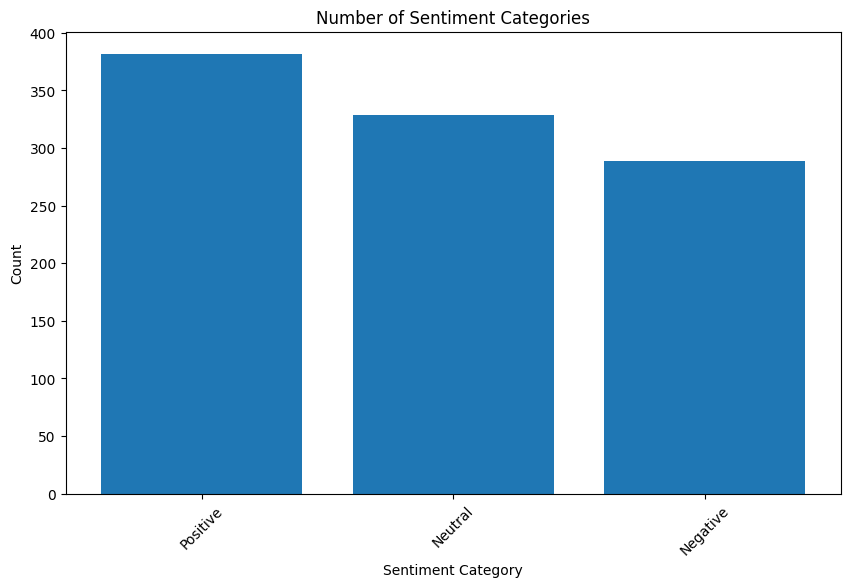

In [85]:

sentiment_category_counts = data2['sentiment_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(sentiment_category_counts.index, sentiment_category_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Number of Sentiment Categories')

plt.xticks(rotation=45)

plt.show()


#Assignment3
Create a visual in the notebook that shows how much revenue is coming from different countries to the DVD store

in this analysis ,I have brought countries with sum amount of greater that 500 to show countries which have the most share in revenue of each store.

In [ ]:
data3=pd.read_csv("Project-assignmenttable3.csv")
data3

,country,store_id,sum
0,Argentina,1,950.72
1,Brazil,1,1576.35
2,Brazil,2,1342.84
3,China,1,2779.25
4,China,2,2471.78
5,Germany,1,513.79
6,India,2,2224.63
7,India,1,3810.15
8,Indonesia,2,753.24
9,Indonesia,1,599.45


In [ ]:
grouped_data = data3.groupby('store_id')

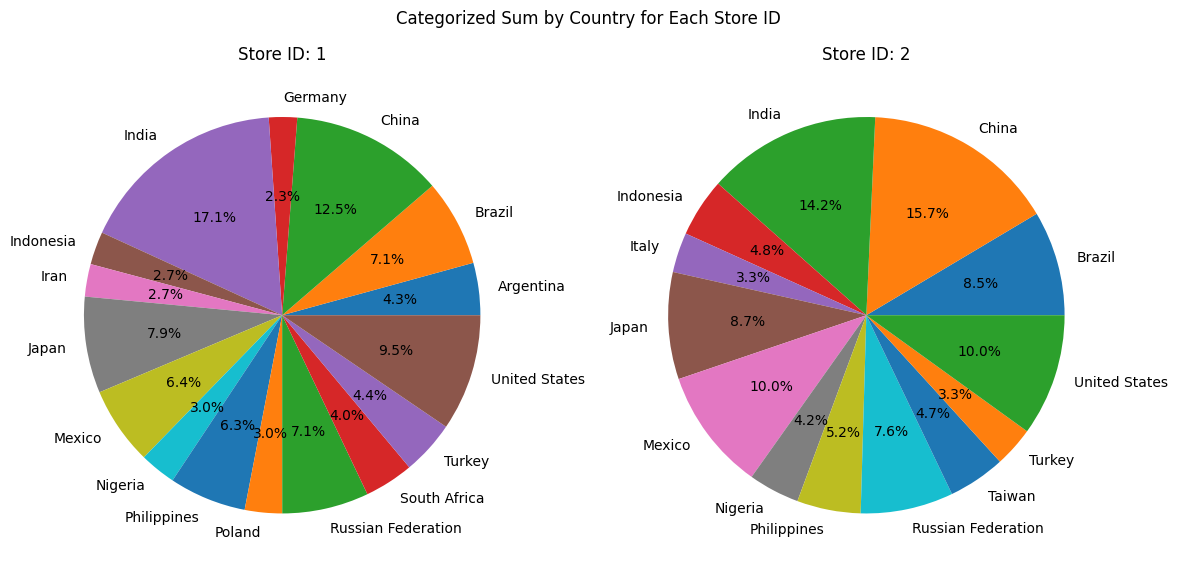

In [ ]:
grouped_data = data3.groupby('store_id')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (store_id, store_data) in enumerate(grouped_data):
    ax = axes[i]

    country_sum = store_data.groupby('country')['sum'].sum()

    ax.pie(country_sum, labels=country_sum.index, autopct='%1.1f%%')
    ax.set_title('Store ID: {}'.format(store_id))

fig.suptitle('Categorized Sum by Country for Each Store ID')
plt.tight_layout()
plt.show()


#Assignment4
Do an analysis to show which actors are bringing in the most revenue (top 10 ranked)

In [ ]:
data4=pd.read_csv("Project-assignmenttable4.csv")
data4

,actor_name,revenue
0,Jayne Neeson,1749.48
1,Kenneth Hoffman,1678.81
2,Lucille Dee,1608.61
3,Renee Ball,1875.47
4,Adam Hopper,1365.61
...,...,...
194,Scarlett Bening,1582.67
195,Matthew Leigh,1791.29
196,Carmen Hunt,1486.26
197,Grace Mostel,1892.57


In [ ]:
sorted_data = data4.sort_values(by='revenue', ascending=False)

In [ ]:
top_actors = sorted_data.head(10)[['actor_name', 'revenue']]
top_actors

,actor_name,revenue
101,Susan Davis,3193.49
184,Gina Degeneres,3129.17
155,Matthew Carrey,2543.78
6,Mary Keitel,2426.92
135,Scarlett Damon,2403.81
98,Walter Torn,2403.18
117,Henry Berry,2392.36
103,Christian Akroyd,2378.97
145,Angela Witherspoon,2357.11
157,Cameron Zellweger,2322.94


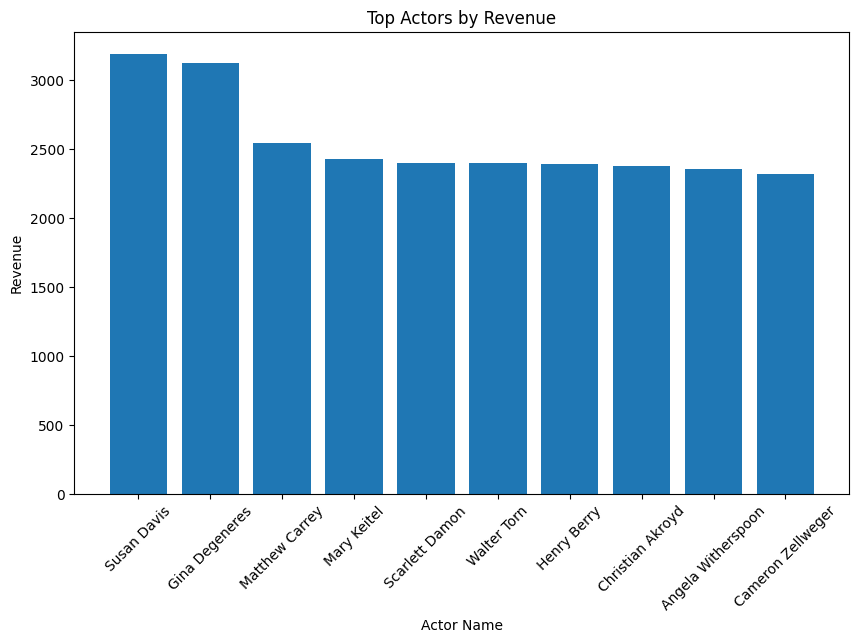

In [ ]:
actor_names = top_actors['actor_name']
revenues = top_actors['revenue']


plt.figure(figsize=(10, 6))
plt.bar(actor_names, revenues)
plt.xlabel('Actor Name')
plt.ylabel('Revenue')
plt.title('Top Actors by Revenue')
plt.xticks(rotation=45)

plt.show()

#Assignment5
Create a new data-frame where you classify some different countries into some categories that make sense to you (8 countries min, 20 max) in this df there will be two columns, one column will give the country name, the other column will give the classification category.

In [ ]:
data5 = pd.DataFrame({
    'country': ['Argentina', 'Australia', 'Bolivia', 'Brazil', 'Canada', 'Chile','Colombia' ,'Dominican Republic' , 'Ecuador','Mexico' ,'Nauru' ,'New Zealand', 'Paraguay','Peru' ,'Tonga' ],
    'continent': ['South America', 'Oceania', 'South America', 'South America', 'North America', 'South America', 'South America', 'North America','South America' ,'North America' ,'Oceania' ,'Oceania' ,'South America','South America' ,'Oceania']
})

In [ ]:
data5

,country,continent
0,Argentina,South America
1,Australia,Oceania
2,Bolivia,South America
3,Brazil,South America
4,Canada,North America
5,Chile,South America
6,Colombia,South America
7,Dominican Republic,North America
8,Ecuador,South America
9,Mexico,North America


#Assignment6
Use an appropriate merge to merge that new data-frame from the last step with a dataframe from the dvd db, that gives the countries, so now countries are connected with their classification

In [ ]:
data6=pd.read_csv("Project-assignmenttable5.6.csv")

In [ ]:
merged_data = pd.merge(data5, data6, on='country', how='left')
print(merged_data)

               country      continent  country_id          last_update
0            Argentina  South America           6  2006-02-15 09:44:00
1            Australia        Oceania           8  2006-02-15 09:44:00
2              Bolivia  South America          14  2006-02-15 09:44:00
3               Brazil  South America          15  2006-02-15 09:44:00
4               Canada  North America          20  2006-02-15 09:44:00
5                Chile  South America          22  2006-02-15 09:44:00
6             Colombia  South America          24  2006-02-15 09:44:00
7   Dominican Republic  North America          27  2006-02-15 09:44:00
8              Ecuador  South America          28  2006-02-15 09:44:00
9               Mexico  North America          60  2006-02-15 09:44:00
10               Nauru        Oceania          65  2006-02-15 09:44:00
11         New Zealand        Oceania          68  2006-02-15 09:44:00
12            Paraguay  South America          73  2006-02-15 09:44:00
13    